# Introduction

From the file import_tweets_hashtag.py I imported 34339 tweets that contains any of these words Russia, Ukraine, or #UkraineRussiaWar.

### Import necessary libraries 

In [1]:
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams, ngrams

### Transfer the Imported Data to a Dataframe
After importing the tweets using the Twitter API in the import_tweets_hashtag.py file, we will read it using a dataframe, and check the shape and the missing data on the raw data

In [2]:
raw_df = pd.read_csv('raw_data.csv')
#raw_df.sample(10)
raw_df.shape

(16000, 17)

<AxesSubplot:>

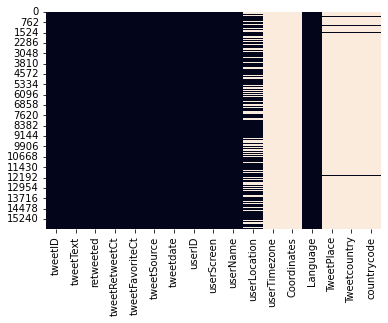

In [3]:
sns.heatmap(raw_df.isnull(), cbar=False)

#### Choose the feature 

## Data Dictionary 

| Syntax                | Description |
| -----------           | ----------- |
|- tweetID :            | The unique identifier for Tweet. The dataset contain 34339 uniq tweets | 
|- tweetText :          | The actual text of the tweet |
|- tweetRetweetCt :     | Number of times this Tweet has been retweeted|
|- tweetFavoriteCt:     | Indicates approximately how many times this Tweet has been liked by Twitter users |
|- tweetCreated:        | UTC time when this Tweet was created  |
|- userID:              | The user ID who posted this Tweet |
|- userName:            | The user Name who posted this Tweet |
|- userLocation:        | The location of the user  |
|- Tweetcountry:        | The location of the user  |

In [5]:
tweet_df = raw_df[['tweetID','tweetText','retweeted', 'tweetRetweetCt','tweetFavoriteCt','tweetdate','userID','userName','userLocation','TweetPlace','Tweetcountry']]
tweet_df.shape

(16000, 11)

#### Change the tweetdate to datetime format  

In [7]:
#tweet_df['tweetdate'] = pd.to_datetime(tweet_df['tweetdate'])
#tweet_df['date'] = tweet_df['tweetdate'].dt.date
tweet_df.date.value_counts()

2022-02-28    16000
Name: date, dtype: int64

#### Fill the missing of user location with tweet country

In [8]:
len(tweet_df[tweet_df.userLocation.isnull()])

6081

#### Delete the duplicate tweets

In [9]:
tweet_df.tweetText.value_counts()

@Steam @Steam\n\n BLOCK Russia #StopWarInUkraine #StopRussia                                                                                      6
@nytimes Still very far from making a scratch on Putin. He continues to bomb Ukraine.\n#Embargo on Russian Oil and Gas                            5
@NATO close the sky over #Ukraine!\n#StopRussianAggression #StopWarInUkraine #StopRussia #StopPutin                                               4
@BostonDynamics @SamuelAdamsBeer STOP RUSSIAN AGGRESSION AGAINST #UKRAINE. Ukraine need your help 🙏\n#StandWithUkriane #StopRussianAgression      3
@Ukraine Every Entertainment Platform should be banned for russia                                                                                 3
                                                                                                                                                 ..
@nypost And this is how you know that billionaire investor Bill Ackman is laundering money through Ukraine.     

In [10]:
tweet_df['duplicattweet'] = tweet_df.duplicated(subset=['tweetText'], keep='first')

/tmp/ipykernel_21358/3049151882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['duplicattweet'] = tweet_df.duplicated(subset=['tweetText'], keep='first')


In [11]:
tweet_df.duplicattweet.value_counts()

False    15964
True        36
Name: duplicattweet, dtype: int64

In [12]:
tweet_df.drop(tweet_df[tweet_df.duplicattweet == True].index, inplace=True)
tweet_df.duplicattweet.value_counts()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


False    15964
Name: duplicattweet, dtype: int64

---------------------------------------------------------------------------------------------------

# Under Development  

In [ ]:
len(tweet_df[tweet_df.userLocation.isnull() & (tweet_df.countrycode.notnull())]) 

In [ ]:
tweet_df[(tweet_df.userLocation.isnull() & (tweet_df.countrycode.notnull()))]

In [ ]:
tweet_df.info()

In [ ]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    tweet_df,
    x="TweetPlace",hue="TweetPlace", 
    multiple="stack",
    ax=ax,
)
plt.xticks(rotation=45)
plt.show()

In [ ]:
raw_df.tweetdate.value_counts()

In [ ]:
tweet_df.sample(100)

In [ ]:
tweet_df.userLocation.value_counts()

In [ ]:
tweet_df.retweeted.value_counts()

In [ ]:
tweet_df.tweetText.value_counts()

In [ ]:
tweet_df.date.value_counts()

In [ ]:
tweet_df.tweetID.value_counts()